# Section 1

## Problem Statement

A meal delivery company which operates in multiple cities. They have various fulfillment centers in the cities for dispatching meal orders to their customers. The client wants our help in these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly. So we need to predict the demand of food for the next 10 week based on the data available for past 145 weeks.

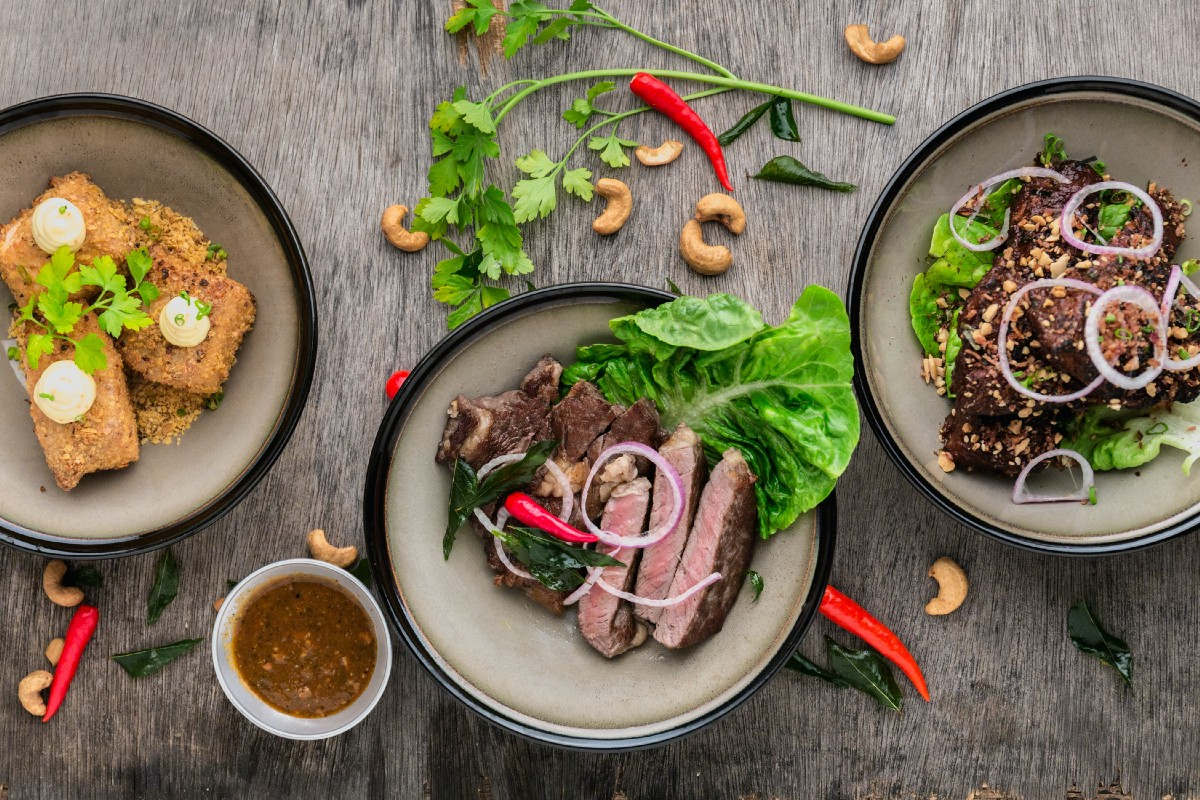

Image source: [1]

### Benefits:
The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set

Since we know food comes under the perishable items and replenishment of raw materials is done on a weekly basis. So the weekly procurement planning becomes utmost important.
Therefore, predicting the demand of number of orders helps us to plan better in advance and helps in reducing the wastages.

# Section 2

## 2.1 Data Source:
The dataset was taken from Kaggle. [2]

## 2.2 Data Description:

1. The Dataset Contains 4 CSV files train.csv, fulfilment_center_info.csv, meal_info.csv and test.csv.
2. Train.csv: It contains the historical demand data for all centers. It has 456548 data points with 9 features.
3. Test.csv: It contains all the features of Train.csv except the target variable.
4. fulfilment_center_info.csv: It contains information for each fulfilment center.
5. meal_info.csv: It contains information for each meal being served.

# Section 3

We first used the Linear Regression model and we got a R2 score of about 0.17 which is quite below. So we used neural network for the prediction purpose.

**Advantages of Neural Network:**
Neural networks offer a number of advantages, including requiring less formal statistical training, ability to implicitly detect complex nonlinear relationships between dependent and independent variables, ability to detect all possible interactions between predictor variables, and the availability of multiple training algorithms. [3]

# Section 4

#### 4.1 IMPORTING LIBRARIES

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adagrad

from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError

#### 4.2 Training Data

In [2]:
data = pd.read_csv("train.csv")
data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [3]:
data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


#### 4.3 Since there is no column having any null values so we will merge the our train.csv file with fulfilment center csv and meal info csv

In [5]:
data_fulfil_centre = pd.read_csv("fulfilment_center_info.csv")
data_fulfil_centre

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [6]:
data_center = pd.merge(data, data_fulfil_centre, on = "center_id")
data_center

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5


In [7]:
data_meal_info = pd.read_csv("meal_info.csv")
data_meal_info

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [8]:
data_center_meal = pd.merge(data_center, data_meal_info, on = "meal_id")
data_center_meal

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,TYPE_A,4.5,Fish,Continental
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,TYPE_A,4.5,Fish,Continental
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,TYPE_A,4.5,Fish,Continental
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,TYPE_A,4.5,Fish,Continental


#### 4.4 Now we will check whether the customer were given discount or not using the checkout price and base peice 

In [9]:
data_center_meal["discount_amount"] = data_center_meal["base_price"] - data_center_meal["checkout_price"]

In [10]:
data_center_meal["discount_percent"] = ((data_center_meal["base_price"]-data_center_meal["checkout_price"])/data_center_meal["base_price"])*100

In [11]:
data_center_meal["discount_y/n"] = [1 if x>0 else 0 for x in (data_center_meal["discount_amount"])]

In [12]:
data_center_meal

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_amount,discount_percent,discount_y/n
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,15.46,10.151684,1
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai,16.46,10.808326,1
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai,1.00,0.746714,1
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai,-1.00,-0.741510,0
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai,1.00,0.677966,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,TYPE_A,4.5,Fish,Continental,47.50,7.533345,1
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,TYPE_A,4.5,Fish,Continental,1.00,0.171812,1
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,TYPE_A,4.5,Fish,Continental,-2.00,-0.344216,0
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,TYPE_A,4.5,Fish,Continental,-1.00,-0.172108,0


#### 4.5 Now here we will predict the food demand in two ways.

First we'll predict food demand for different center types, here we have 3 different center types named Type A, Type B and Type C, based on this we'll get to know out of three center types A, B and C which are three different centers in three different regions Urban, Semi Urban and Rural areas. Doing this will give us clear view on the demand and stock holding for the particular center.

Second approach will be to predict the food demand for different regions. There are 8 different regions and we have checked the number of food orders for all the 8 regions for past 145 weeks. Based on that we'll predict the food demand in that particular region for the next 10 weeks. Now we'll have the demand for the all the regions so it will give a better view at stocking of raw materials for the next 10 weeks.

In [13]:
data_center_meal["region_code"].nunique()

8

In [14]:
data_center_meal.groupby(["region_code"])["num_orders"].agg(sum)

region_code
23     1609906
34    24051733
35      691044
56    60520191
71     2103282
77    20529653
85     8685386
93     1366290
Name: num_orders, dtype: int64

In [15]:
data_center_meal.groupby(["center_type"])["num_orders"].agg(sum)

center_type
TYPE_A    68978517
TYPE_B    29996073
TYPE_C    20582895
Name: num_orders, dtype: int64

In [16]:
train_data = data_center_meal.copy()

#### 4.6 Plotting the Number of Orders Each type of center is getting

Center in Urban Areas received maximum number of orders, followed by the Semi-Urban and Rural Areas

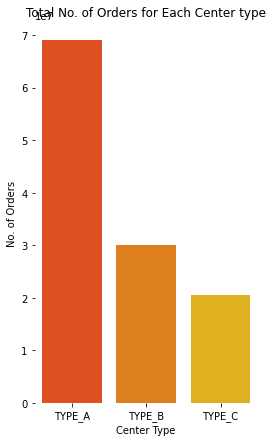

In [17]:
fig=plt.figure(figsize=(4,7))
plt.title('Total No. of Orders for Each Center type')
sns.barplot(y='num_orders', x='center_type', data=train_data.groupby('center_type').sum()['num_orders'].reset_index(),palette='autumn');
plt.ylabel('No. of Orders')
plt.xlabel('Center Type')
sns.despine(bottom = True, left = True);

#### 4.6 Plotting the Region wise number of orders

The Highest number of orders were received by region 56, followed by 34 and rest others

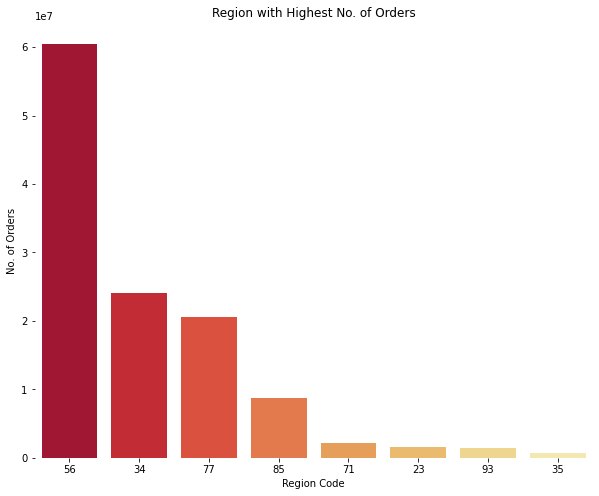

In [18]:
fig=plt.figure(figsize=(10,8))
plt.title('Region with Highest No. of Orders')
sns.barplot(y='num_orders', x='region_code', data=train_data.groupby(['region_code']).num_orders.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r',order=list(train_data.groupby(['region_code']).num_orders.sum().sort_values(ascending=False).reset_index()['region_code']));
plt.ylabel('No. of Orders')
plt.xlabel('Region Code')
sns.despine(bottom = True, left = True);

#### 4.7 Plotting Number of orders for each food Cuisine

From the plot we can see Italian received the maximum number of orders followed by Thai, Indian and Continental

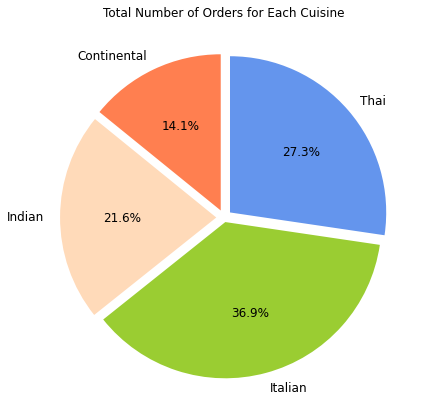

In [19]:
plt.figure(figsize=(6,6))
colors = ['coral','#FFDAB9','yellowgreen','#6495ED']
plt.pie(train_data.groupby(['cuisine']).num_orders.sum(),
    labels=train_data.groupby(['cuisine']).num_orders.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.03,0.05),
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 12})
plt.title('Total Number of Orders for Each Cuisine')
plt.tight_layout()
plt.show()

#### 4.8 Plotting the number of orders received every week

From the Plot obtained we can see that highest number of orders we received in the week 47 and the lowest number of orders were reveived in the week 62

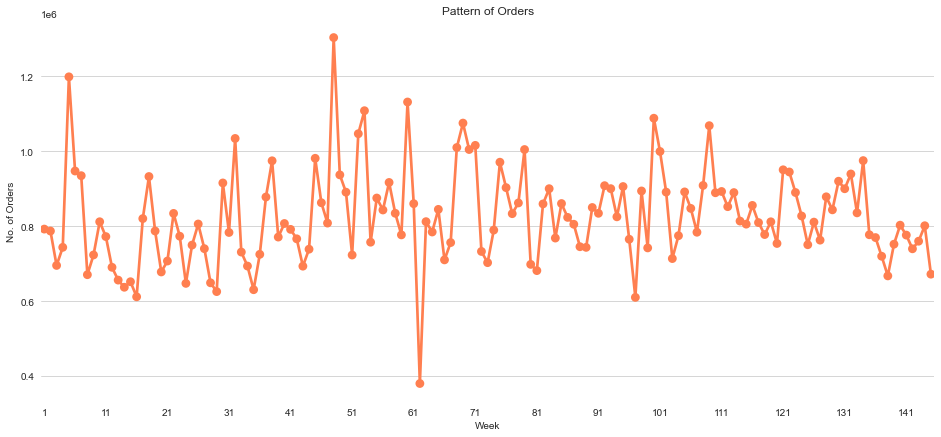

In [20]:
fig=plt.figure(figsize=(16,7))
sns.set_style("whitegrid")
plt.title('Pattern of Orders')

sns.pointplot(x=train_data.groupby('week').sum().reset_index()['week'],y=train_data.groupby('week').sum().reset_index()['num_orders'],color='coral')
plt.xticks(range(0, 150, 10))
plt.ylabel('No. of Orders')
plt.xlabel('Week')
sns.despine(bottom = True, left = True);

#### 4.9 Handling the Categorical Variables of training file

In [21]:
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()

In [22]:
train_data = data_center_meal.copy()

In [23]:
train_data.groupby(['center_type','cuisine'])['num_orders'].agg('sum')
train_data["center_type"] = encoder1.fit_transform(train_data["center_type"])
train_data["category"] = encoder2.fit_transform(train_data["category"])
train_data["cuisine"] = encoder3.fit_transform(train_data["cuisine"])
train_data = train_data.sort_values(['center_id', 'meal_id', 'week']).reset_index()
train_data.head()

,index,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_amount,discount_percent,discount_y/n
0,82183,1436842,1,10,1062,181.39,181.39,0,0,865,590,56,1,6.3,0,2,0.0,0.000000,0
1,82184,1205013,2,10,1062,183.36,182.36,0,0,782,590,56,1,6.3,0,2,-1.0,-0.548366,0
2,82185,1447751,3,10,1062,184.36,182.36,0,0,851,590,56,1,6.3,0,2,-2.0,-1.096732,0
3,82186,1014968,4,10,1062,182.36,183.36,0,0,1202,590,56,1,6.3,0,2,1.0,0.545375,1
4,82187,1003563,5,10,1062,183.39,181.39,0,0,958,590,56,1,6.3,0,2,-2.0,-1.102597,0


In [24]:
train_data1 = train_data.drop(["id", "index", "center_id", "week", "meal_id", "checkout_price", "base_price", "discount_amount", "discount_percent"], axis = 1)
tr_corr = train_data1.corr(method = "pearson")

In [25]:
tr_corr

,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_y/n
emailer_for_promotion,1.000000,0.390534,0.277147,-0.005234,-0.007462,0.006194,-0.019462,0.095683,-0.151910,0.276454
homepage_featured,0.390534,1.000000,0.294490,0.008640,0.003605,-0.030041,0.041498,0.000885,-0.014629,0.213979
num_orders,0.277147,0.294490,1.000000,0.041596,0.029744,-0.038199,0.176976,0.026520,0.127653,0.111766
city_code,-0.005234,0.008640,0.041596,1.000000,0.042686,0.091500,0.131476,0.007676,0.013208,0.003876
region_code,-0.007462,0.003605,0.029744,0.042686,1.000000,-0.009658,0.023327,0.005776,0.017213,0.003672
center_type,0.006194,-0.030041,-0.038199,0.091500,-0.009658,1.000000,-0.219791,-0.007919,-0.002179,0.001167
op_area,-0.019462,0.041498,0.176976,0.131476,0.023327,-0.219791,1.000000,0.014487,0.012654,-0.004067
category,0.095683,0.000885,0.026520,0.007676,0.005776,-0.007919,0.014487,1.000000,0.132044,-0.022227
cuisine,-0.151910,-0.014629,0.127653,0.013208,0.017213,-0.002179,0.012654,0.132044,1.000000,-0.023181
discount_y/n,0.276454,0.213979,0.111766,0.003876,0.003672,0.001167,-0.004067,-0.022227,-0.023181,1.000000


In [26]:
import seaborn as sns

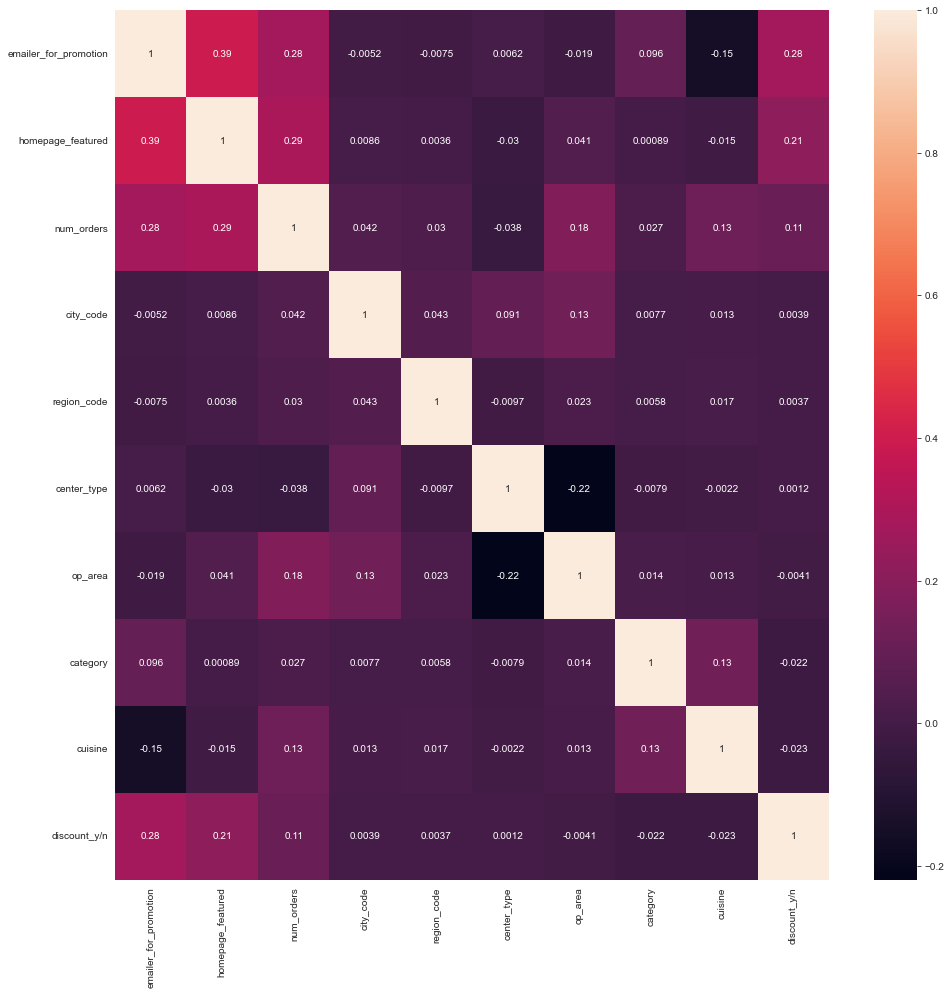

In [27]:
plt.subplots(figsize = (16,16))
sns.heatmap(train_data1.corr(), annot = True)
plt.show()

#### 4.10 Testing Data

In [28]:
test_data = pd.read_csv("test.csv")
test_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0
...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0


#### 4.11 Merging the fulfiment center and meal info with the test csv file

In [29]:
test_center = pd.merge(test_data, data_fulfil_centre, on = "center_id")

test_center_meal = pd.merge(test_center, data_meal_info, on = "meal_id")

#### 4.12 Calculating the discount percentage using checkout price and base price. Checking whether discount was given or not.

In [30]:
test_center_meal["discount_amount"] = test_center_meal["base_price"] - test_center_meal["checkout_price"]

In [31]:
test_center_meal["discount_percent"] = ((test_center_meal["base_price"]-test_center_meal["checkout_price"])/test_center_meal["base_price"])*100

In [32]:
test_center_meal["discount_y/n"] = [1 if x>0 else 0 for x in (test_center_meal["discount_amount"])]

In [33]:
test_center_meal

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,discount_amount,discount_percent,discount_y/n
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai,1.0,0.628496,1
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai,0.0,0.000000,0
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai,1.0,0.632351,1
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai,-2.0,-1.272750,0
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai,-1.0,-0.628496,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1412025,146,61,2104,583.03,581.03,0,0,473,77,TYPE_A,4.5,Fish,Continental,-2.0,-0.344216,0
32569,1287019,147,61,2104,582.03,582.03,0,1,473,77,TYPE_A,4.5,Fish,Continental,0.0,0.000000,0
32570,1396176,149,61,2104,629.53,629.53,0,0,473,77,TYPE_A,4.5,Fish,Continental,0.0,0.000000,0
32571,1331977,150,61,2104,629.53,629.53,0,0,473,77,TYPE_A,4.5,Fish,Continental,0.0,0.000000,0


#### 4.13 Handling the Categorical Variables of test file

In [34]:
test_data1 = test_center_meal.copy()

test_data1["center_type"] = encoder1.fit_transform(test_data1["center_type"])
test_data1["category"] = encoder2.fit_transform(test_data1["category"])
test_data1["cuisine"] = encoder3.fit_transform(test_data1["cuisine"])
test_data1 = test_data1.sort_values(['center_id', 'meal_id', 'week']).reset_index()
test_data2 = test_data1.copy()
test_data_final = test_data2.drop(["index", "id", "week", "center_id", "meal_id", "checkout_price", "base_price", "discount_amount", "discount_percent"], axis = 1)
test_data_final.head()

,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,discount_y/n
0,0,0,590,56,1,6.3,0,2,0
1,0,0,590,56,1,6.3,0,2,1
2,0,0,590,56,1,6.3,0,2,0
3,0,0,590,56,1,6.3,0,2,0
4,0,0,590,56,1,6.3,0,2,0


#### 4.14 Food Demand for different center types

##### 4.14.1 for training

In [35]:
train_data2 = train_data1.drop(["center_type"], axis = 1)
train_data2

,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,category,cuisine,discount_y/n
0,0,0,865,590,56,6.3,0,2,0
1,0,0,782,590,56,6.3,0,2,0
2,0,0,851,590,56,6.3,0,2,0
3,0,0,1202,590,56,6.3,0,2,1
4,0,0,958,590,56,6.3,0,2,0
...,...,...,...,...,...,...,...,...,...
456543,0,0,82,649,34,3.4,4,0,0
456544,0,0,40,649,34,3.4,4,0,0
456545,0,0,27,649,34,3.4,4,0,0
456546,0,0,15,649,34,3.4,4,0,1


In [36]:
Y = train_data2["num_orders"]
X = train_data2.drop(["num_orders"], axis = 1)

In [37]:
Scale = StandardScaler()
X_new = Scale.fit_transform(X)

In [38]:
X_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size = 0.2, random_state = 42)

###### 4.14.2 For testing

In [39]:
test_data1 = test_data_final.drop(["center_type"], axis = 1)
test_data1

,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,category,cuisine,discount_y/n
0,0,0,590,56,6.3,0,2,0
1,0,0,590,56,6.3,0,2,1
2,0,0,590,56,6.3,0,2,0
3,0,0,590,56,6.3,0,2,0
4,0,0,590,56,6.3,0,2,0
...,...,...,...,...,...,...,...,...
32568,1,1,649,34,3.4,11,0,1
32569,1,0,649,34,3.4,11,0,1
32570,0,0,649,34,3.4,11,0,0
32571,0,0,649,34,3.4,11,0,0


In [40]:
test1 = Scale.fit_transform(test_data1)

# Section 5

### 5.1 Model Building

In [45]:
linearRegressor=LinearRegression()
linearRegressor.fit(X_train,y_train)

LinearRegression()

In [46]:
y_predicted = linearRegressor.predict(x_test)
mse = mean_squared_error(y_test, y_predicted)
r = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test,y_predicted)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 132905.1885685241
R score: 0.17184528502836238
Mean Absolute Error: 207.17151720932512


In [47]:
# loss of linear regression task
def linreg_loss(w, Xs, Ys):
    return np.mean((np.dot(Xs,w) - Ys)**2)

# gradient of linear regression task
def linreg_grad(w, Xs, Ys):
    return (Xs.T @ (Xs @ w - Ys)) * (2/len(Ys))

def linreg_gradient_descent(Xs, Ys, alpha, w0, num_iters):
    w = w0;
    losses = np.zeros(num_iters + 1)
    for k in range(num_iters):
        losses[k] = linreg_loss(w, Xs, Ys)
        w = w - alpha * linreg_grad(w, Xs, Ys)
    
    losses[num_iters] = linreg_loss(w, Xs, Ys)
    return (w, losses);

In [48]:
w0 = np.zeros(X_train.shape[1])
alpha = 1e-2 # setting the step size larger results in divergence!
num_iters = 600

(w_gd, losses_gd) = linreg_gradient_descent(X_train, y_train, alpha, w0, num_iters)

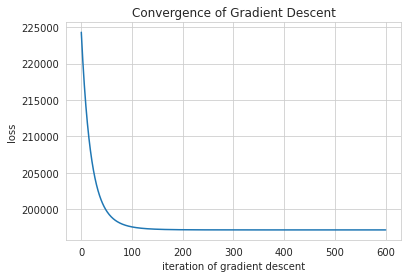

In [49]:
plt.plot(range(num_iters+1), losses_gd);
plt.xlabel("iteration of gradient descent");
plt.ylabel("loss");
plt.title("Convergence of Gradient Descent");

#### 5.2 SGD with Mini batching

#### Minibatching!

One way to make SGD require fewer iterations is by decreasing the value of the gradient variance bound $\sigma^2$. A powerful way to do this is by using *minibatching*.

With minibatching, we use a sample of gradients of size larger than $1$. I.e.:

$$w_{t+1} = w_t - \alpha \cdot \frac{1}{B} \sum_{b=1}^B \nabla f_{i_{t,b}}(w_t) = w_t - \alpha \cdot \frac{1}{B} \sum_{b=1}^B \nabla_w \ell(w_t; x_{i_{t,b}}, y_{i_{t,b}}).$$

where $B$ is the *minibatch size* or *batch size*, and the $i_{t,b}$ are $b$ random variables drawn independently and uniformly from $\{1,\ldots,n\}$ (where $n$ is the size of the training set).

In [50]:
# Creating model using the Sequential in tensorflow

def model_sequential():
    model = Sequential([
    Dense(160, kernel_initializer='normal', activation='relu'),
    #Dropout(0.2),
    Dense(480, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(256, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
    ])
    return model

#build the model
model = model_sequential()

In [51]:
learning_rate = 0.01
# loss function
msle = MeanSquaredLogarithmicError()

model.compile(loss=msle, optimizer=SGD(learning_rate=learning_rate))

# train the model
history = model.fit(X_train, y_train, epochs = 100, batch_size=64, validation_split=0.2)

Epoch 1/100
4566/4566 [==============================] - 17s 3ms/step - loss: 1.4021 - val_loss: 1.1474
Epoch 2/100
4566/4566 [==============================] - 13s 3ms/step - loss: 1.1143 - val_loss: 1.0720
Epoch 3/100
4566/4566 [==============================] - 14s 3ms/step - loss: 1.0526 - val_loss: 1.0189
Epoch 4/100
4566/4566 [==============================] - 14s 3ms/step - loss: 0.9935 - val_loss: 0.9408
Epoch 5/100
4566/4566 [==============================] - 14s 3ms/step - loss: 0.8728 - val_loss: 0.7674
Epoch 6/100
4566/4566 [==============================] - 14s 3ms/step - loss: 0.6820 - val_loss: 0.6018
Epoch 7/100
4566/4566 [==============================] - 14s 3ms/step - loss: 0.5926 - val_loss: 0.5646
Epoch 8/100
4566/4566 [==============================] - 14s 3ms/step - loss: 0.5702 - val_loss: 0.5511
Epoch 9/100
4566/4566 [==============================] - 13s 3ms/step - loss: 0.5584 - val_loss: 0.5435
Epoch 10/100
4566/4566 [==============================] - 15s 3m

[]

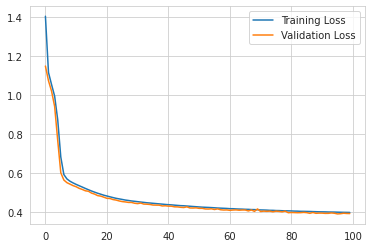

In [52]:
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.plot()

In [53]:
y_pred=model.predict(x_test)

In [54]:
r_SGD_MB = r2_score(y_test, y_pred)
print('Accuracy optained by MiniBatching ', r_SGD_MB)

Accuracy optained by MiniBatching  0.5604550218013952


#### 5.2.1 Forecasting using MiniBatching

In [55]:
sgd_mini_batching_forecast = model.predict(test1)

In [56]:
frcast = pd.DataFrame(columns=["center_type", "Forecasted Value"])
frcast["center_type"] = test_data_final["center_type"]
frcast["Forecasted Value"] = sgd_mini_batching_forecast
frcast["center_type"] = frcast["center_type"].replace(to_replace = [0,1,2], value = ["Urban", "Semi-Urban", "Rural"])
frcast.groupby(["center_type"])["Forecasted Value"].agg(sum)

center_type
Rural         1289936.125
Semi-Urban    1929209.000
Urban         4241440.500
Name: Forecasted Value, dtype: float32

#### 5.3 SGD with Momentum

#### Momentum


Usually we run something like this:

\begin{align*}
  v_{t+1} &= \beta v_t - \alpha \nabla L_{\tilde i_t}(w_t) \\
  w_{t+1} &= w_t + v_{t+1}.
  \\Here\quad \beta\quad is\quad momentum\quad parameter
\end{align*}



#### 5.3.1 Training the Neural Network

In [57]:
# Creating model using the Sequential in tensorflow

def model_sequential():
    model = Sequential([
    Dense(160, kernel_initializer='normal', activation='relu'),
    #Dropout(0.2),
    Dense(480, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(256, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
    ])
    return model

#build the model
model = model_sequential()

In [58]:
learning_rate = 0.01

# loss function
msle = MeanSquaredLogarithmicError()

model.compile(loss=msle, optimizer=SGD(learning_rate = learning_rate, momentum=0.9))

# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
4566/4566 [==============================] - 15s 3ms/step - loss: 0.9344 - val_loss: 0.5624
Epoch 2/100
4566/4566 [==============================] - 14s 3ms/step - loss: 0.5390 - val_loss: 0.4975
Epoch 3/100
4566/4566 [==============================] - 14s 3ms/step - loss: 0.4935 - val_loss: 0.4748
Epoch 4/100
4566/4566 [==============================] - 13s 3ms/step - loss: 0.4719 - val_loss: 0.4582
Epoch 5/100
4566/4566 [==============================] - 14s 3ms/step - loss: 0.4586 - val_loss: 0.4485
Epoch 6/100
4566/4566 [==============================] - 14s 3ms/step - loss: 0.4490 - val_loss: 0.4381
Epoch 7/100
4566/4566 [==============================] - 14s 3ms/step - loss: 0.4419 - val_loss: 0.4416
Epoch 8/100
4566/4566 [==============================] - 14s 3ms/step - loss: 0.4359 - val_loss: 0.4253
Epoch 9/100
4566/4566 [==============================] - 14s 3ms/step - loss: 0.4315 - val_loss: 0.4241
Epoch 10/100
4566/4566 [==============================] - 14s 3m

[]

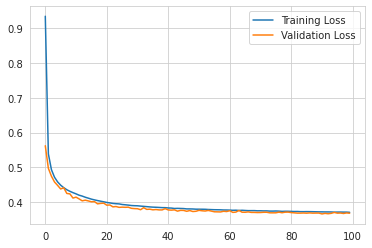

In [59]:
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.plot()

In [60]:
y_pred_momentum = model.predict(x_test)

In [61]:
r_SGD_momentum = r2_score(y_test, y_pred_momentum)
print('Accuracy optained by SGD with Momentum ', r_SGD_momentum)

Accuracy optained by SGD with Momentum  0.6035360447451232


#### 5.3.2 Forecasting Using SGD with momentum

In [62]:
sgd_momentum_forecast = model.predict(test1)

In [63]:
frcast = pd.DataFrame(columns=["center_type", "Forecasted Value"])
frcast["center_type"] = test_data_final["center_type"]
frcast["Forecasted Value"] = sgd_momentum_forecast
frcast["center_type"] = frcast["center_type"].replace(to_replace = [0,1,2], value = ["Urban", "Semi-Urban", "Rural"])
frcast.groupby(["center_type"])["Forecasted Value"].agg(sum)

center_type
Rural         1317258.875
Semi-Urban    1876429.750
Urban         4335127.500
Name: Forecasted Value, dtype: float32

#### 5.4 Using RMSprop

**Algorithm RMSProp**

*Input:* global learning rate factor $\alpha$, decay rate $\rho$, initial parameters $w \in R^d$.

* Initialize $r \leftarrow 0 \in R^d$

* **loop**
  * select a minibatch $\mathcal{B}$ of size $B$
  * compute the stochastic gradient $g \leftarrow \frac{1}{B} \sum_{i \in \mathcal{B}} \nabla f_i(w)$
  * accumulate second moment estimate $r_j \leftarrow \rho r_j + (1 - \rho) g_j^2$ for all $j \in \{1, \ldots, d \}$
  * update model $w_j \rightarrow w_j - \frac{\alpha}{\sqrt{r_j}} \cdot g_j$ for all $j \in \{1, \ldots, d \}$

#### 5.4.1 Training the Neural Network

In [64]:
# Creating model using the Sequential in tensorflow

def model_sequential():
    model = Sequential([
    Dense(160, kernel_initializer='normal', activation='relu'),
    #Dropout(0.2),
    Dense(480, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(256, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
    ])
    return model

#build the model
model = model_sequential()

In [65]:
learning_rate = 0.01

# loss function
msle = MeanSquaredLogarithmicError()

model.compile(loss=msle, optimizer = RMSprop(learning_rate = learning_rate))

# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
4566/4566 [==============================] - 17s 4ms/step - loss: 0.5403 - val_loss: 0.4736
Epoch 2/100
4566/4566 [==============================] - 16s 3ms/step - loss: 0.4618 - val_loss: 0.4453
Epoch 3/100
4566/4566 [==============================] - 16s 3ms/step - loss: 0.4425 - val_loss: 0.4325
Epoch 4/100
4566/4566 [==============================] - 17s 4ms/step - loss: 0.4336 - val_loss: 0.4202
Epoch 5/100
4566/4566 [==============================] - 16s 3ms/step - loss: 0.4277 - val_loss: 0.4275
Epoch 6/100
4566/4566 [==============================] - 16s 3ms/step - loss: 0.4231 - val_loss: 0.4096
Epoch 7/100
4566/4566 [==============================] - 16s 3ms/step - loss: 0.4189 - val_loss: 0.4215
Epoch 8/100
4566/4566 [==============================] - 17s 4ms/step - loss: 0.4160 - val_loss: 0.4127
Epoch 9/100
4566/4566 [==============================] - 17s 4ms/step - loss: 0.4144 - val_loss: 0.4186
Epoch 10/100
4566/4566 [==============================] - 18s 4m

[]

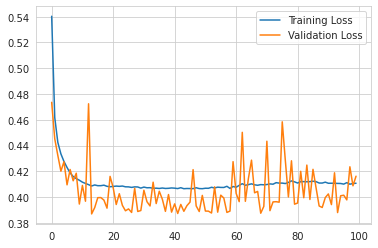

In [66]:
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.plot()

In [67]:
y_pred_RMSprop = model.predict(x_test)

In [68]:
r_SGD_RMSprop = r2_score(y_test, y_pred_RMSprop)
print('Accuracy optained by SGD with RMSProp ', r_SGD_RMSprop)

Accuracy optained by SGD with RMSProp  0.6004829402849694


#### 5.4.2 Forecasting Using SGD with RMSprop

In [69]:
sgd_RMSprop_forecast = model.predict(test1)

In [70]:
frcast = pd.DataFrame(columns=["center_type", "Forecasted Value"])
frcast["center_type"] = test_data_final["center_type"]
frcast["Forecasted Value"] = sgd_RMSprop_forecast
frcast["center_type"] = frcast["center_type"].replace(to_replace = [0,1,2], value = ["Urban", "Semi-Urban", "Rural"])
frcast.groupby(["center_type"])["Forecasted Value"].agg(sum)

center_type
Rural         1468611.50
Semi-Urban    2314763.75
Urban         5012685.50
Name: Forecasted Value, dtype: float32

#### 5.5 Using Adam

**Algorithm Adam**

*Input:* global learning rate factor $\alpha$, decay rates $\rho_1$ and $\rho_2$, initial parameters $w \in R^d$.

* Initialize $r \leftarrow 0 \in R^d$
* Initialize timestep $t \leftarrow 0$

* **loop**
  * update timestep $t \leftarrow t + 1$
  * select a minibatch $\mathcal{B}$ of size $B$
  * compute the stochastic gradient $g \leftarrow \frac{1}{B} \sum_{i \in \mathcal{B}} \nabla f_i(w)$
  * accumulate first moment estimate $s_j \leftarrow \rho_1 s_j + (1 - \rho_1) g_j$ for all $j \in \{1, \ldots, d \}$
  * accumulate second moment estimate $r_j \leftarrow \rho_2 r_j + (1 - \rho_2) g_j^2$ for all $j \in \{1, \ldots, d \}$
  * correct first moment bias $\hat s \leftarrow \frac{s}{1 - \rho_1^t}$ 
  * correct second moment bias $\hat r \leftarrow \frac{r}{1 - \rho_2^t}$
  * update model $w_j \rightarrow w_j - \frac{\alpha}{\sqrt{\hat r_j}} \cdot \hat s_j$ for all $j \in \{1, \ldots, d \}$

**Adam** is Modified RMSProp to  use momentum with exponential weighting, and correct for bias to
estimate the first-order and second-order moments of the gradients

#### 5.5.1 Training the Neural Network

In [71]:
# Creating model using the Sequential in tensorflow

def model_sequential():
    model = Sequential([
    Dense(160, kernel_initializer='normal', activation='relu'),
    #Dropout(0.2),
    Dense(480, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(256, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
    ])
    return model

#build the model
model = model_sequential()

In [72]:
learning_rate = 0.01

# loss function
msle = MeanSquaredLogarithmicError()

model.compile(loss=msle, optimizer = Adam(learning_rate = learning_rate))

# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
4566/4566 [==============================] - 16s 3ms/step - loss: 0.5806 - val_loss: 0.4714
Epoch 2/100
4566/4566 [==============================] - 15s 3ms/step - loss: 0.4637 - val_loss: 0.4408
Epoch 3/100
4566/4566 [==============================] - 15s 3ms/step - loss: 0.4424 - val_loss: 0.4189
Epoch 4/100
4566/4566 [==============================] - 14s 3ms/step - loss: 0.4278 - val_loss: 0.4024
Epoch 5/100
4566/4566 [==============================] - 15s 3ms/step - loss: 0.4180 - val_loss: 0.4035
Epoch 6/100
4566/4566 [==============================] - 15s 3ms/step - loss: 0.4109 - val_loss: 0.4009
Epoch 7/100
4566/4566 [==============================] - 15s 3ms/step - loss: 0.4067 - val_loss: 0.3970
Epoch 8/100
4566/4566 [==============================] - 15s 3ms/step - loss: 0.4031 - val_loss: 0.3877
Epoch 9/100
4566/4566 [==============================] - 14s 3ms/step - loss: 0.4005 - val_loss: 0.3890
Epoch 10/100
4566/4566 [==============================] - 14s 3m

[]

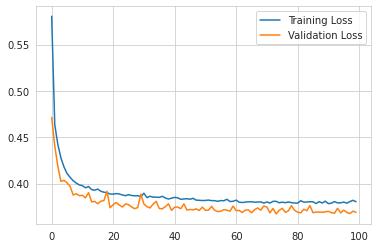

In [73]:
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.plot()

In [74]:
y_pred_Adam = model.predict(x_test)

In [75]:
r_SGD_Adam = r2_score(y_test, y_pred_Adam)
print('Accuracy optained by SGD with Adam ', r_SGD_Adam)

Accuracy optained by SGD with Adam  0.6263850095974859


#### 5.5.2 Forecasting Using SGD with Adam

In [76]:
sgd_Adam_forecast = model.predict(test1)

In [77]:
frcast = pd.DataFrame(columns=["center_type", "Forecasted Value"])
frcast["center_type"] = test_data_final["center_type"]
frcast["Forecasted Value"] = sgd_Adam_forecast
frcast["center_type"] = frcast["center_type"].replace(to_replace = [0,1,2], value = ["Urban", "Semi-Urban", "Rural"])
frcast.groupby(["center_type"])["Forecasted Value"].agg(sum)

center_type
Rural         1294889.250
Semi-Urban    1996020.125
Urban         4421723.500
Name: Forecasted Value, dtype: float32

#### 4.15 Food Demand Prediction Region wise

##### 4.15.1 for training

In [78]:
train_data3 = train_data1.drop(["region_code"], axis = 1)
train_data3

,emailer_for_promotion,homepage_featured,num_orders,city_code,center_type,op_area,category,cuisine,discount_y/n
0,0,0,865,590,1,6.3,0,2,0
1,0,0,782,590,1,6.3,0,2,0
2,0,0,851,590,1,6.3,0,2,0
3,0,0,1202,590,1,6.3,0,2,1
4,0,0,958,590,1,6.3,0,2,0
...,...,...,...,...,...,...,...,...,...
456543,0,0,82,649,0,3.4,4,0,0
456544,0,0,40,649,0,3.4,4,0,0
456545,0,0,27,649,0,3.4,4,0,0
456546,0,0,15,649,0,3.4,4,0,1


In [79]:
Y = train_data3["num_orders"]
X = train_data3.drop(["num_orders"], axis = 1)

In [80]:
Scale = StandardScaler()
X_new = Scale.fit_transform(X)

In [81]:
X_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size = 0.2, random_state = 42)

###### 4.15.2 For testing

In [82]:
test_data2 = test_data_final.drop(["region_code"], axis = 1)
test_data2

,emailer_for_promotion,homepage_featured,city_code,center_type,op_area,category,cuisine,discount_y/n
0,0,0,590,1,6.3,0,2,0
1,0,0,590,1,6.3,0,2,1
2,0,0,590,1,6.3,0,2,0
3,0,0,590,1,6.3,0,2,0
4,0,0,590,1,6.3,0,2,0
...,...,...,...,...,...,...,...,...
32568,1,1,649,0,3.4,11,0,1
32569,1,0,649,0,3.4,11,0,1
32570,0,0,649,0,3.4,11,0,0
32571,0,0,649,0,3.4,11,0,0


In [83]:
test2 = Scale.fit_transform(test_data2)

#### 5.6 Model Building

In [84]:
linearRegressor=LinearRegression()
linearRegressor.fit(X_train,y_train)

LinearRegression()

In [85]:
y_predicted = linearRegressor.predict(x_test)
mse = mean_squared_error(y_test, y_predicted)
r = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test,y_predicted)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 133004.4266913871
R score: 0.17122691549562175
Mean Absolute Error: 207.24022018278015


In [86]:
# loss of linear regression task
def linreg_loss(w, Xs, Ys):
    return np.mean((np.dot(Xs,w) - Ys)**2)

# gradient of linear regression task
def linreg_grad(w, Xs, Ys):
    return (Xs.T @ (Xs @ w - Ys)) * (2/len(Ys))

def linreg_gradient_descent(Xs, Ys, alpha, w0, num_iters):
    w = w0;
    losses = np.zeros(num_iters + 1)
    for k in range(num_iters):
        losses[k] = linreg_loss(w, Xs, Ys)
        w = w - alpha * linreg_grad(w, Xs, Ys)
    
    losses[num_iters] = linreg_loss(w, Xs, Ys)
    return (w, losses);

In [87]:
w0 = np.zeros(X_train.shape[1])
alpha = 1e-2 # setting the step size larger results in divergence!
num_iters = 600

(w_gd, losses_gd) = linreg_gradient_descent(X_train, y_train, alpha, w0, num_iters)

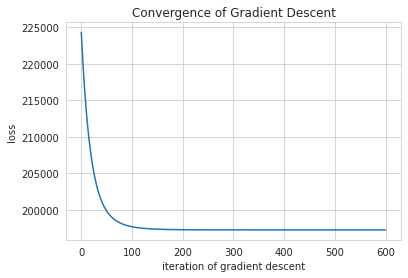

In [88]:
plt.plot(range(num_iters+1), losses_gd);
plt.xlabel("iteration of gradient descent");
plt.ylabel("loss");
plt.title("Convergence of Gradient Descent");

#### 5.7 SGD with Mini batching

#### Minibatching!

One way to make SGD require fewer iterations is by decreasing the value of the gradient variance bound $\sigma^2$. A powerful way to do this is by using *minibatching*.

With minibatching, we use a sample of gradients of size larger than $1$. I.e.:

$$w_{t+1} = w_t - \alpha \cdot \frac{1}{B} \sum_{b=1}^B \nabla f_{i_{t,b}}(w_t) = w_t - \alpha \cdot \frac{1}{B} \sum_{b=1}^B \nabla_w \ell(w_t; x_{i_{t,b}}, y_{i_{t,b}}).$$

where $B$ is the *minibatch size* or *batch size*, and the $i_{t,b}$ are $b$ random variables drawn independently and uniformly from $\{1,\ldots,n\}$ (where $n$ is the size of the training set).

#### 5.7.1 Training the Neural Network

In [89]:
# Creating model using the Sequential in tensorflow

def model_sequential():
    model = Sequential([
    Dense(160, kernel_initializer='normal', activation='relu'),
    #Dropout(0.2),
    Dense(480, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(256, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
    ])
    return model

#build the model
model = model_sequential()

In [90]:
learning_rate = 0.01
# loss function
msle = MeanSquaredLogarithmicError()

model.compile(loss=msle, optimizer=SGD(learning_rate=learning_rate))

# train the model
history = model.fit(X_train, y_train, epochs = 100, batch_size=64, validation_split=0.2)

Epoch 1/100
4566/4566 [==============================] - 15s 3ms/step - loss: 1.4020 - val_loss: 1.1657
Epoch 2/100
4566/4566 [==============================] - 15s 3ms/step - loss: 1.1315 - val_loss: 1.0846
Epoch 3/100
4566/4566 [==============================] - 15s 3ms/step - loss: 1.0584 - val_loss: 1.0236
Epoch 4/100
4566/4566 [==============================] - 14s 3ms/step - loss: 1.0065 - val_loss: 0.9734
Epoch 5/100
4566/4566 [==============================] - 15s 3ms/step - loss: 0.9502 - val_loss: 0.9034
Epoch 6/100
4566/4566 [==============================] - 15s 3ms/step - loss: 0.8405 - val_loss: 0.7359
Epoch 7/100
4566/4566 [==============================] - 15s 3ms/step - loss: 0.6589 - val_loss: 0.5910
Epoch 8/100
4566/4566 [==============================] - 15s 3ms/step - loss: 0.5856 - val_loss: 0.5628
Epoch 9/100
4566/4566 [==============================] - 14s 3ms/step - loss: 0.5642 - val_loss: 0.5453
Epoch 10/100
4566/4566 [==============================] - 14s 3m

[]

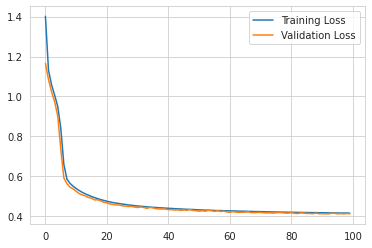

In [91]:
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.plot()

In [92]:
y_pred=model.predict(x_test)

In [93]:
r_SGD_MB = r2_score(y_test, y_pred)
print('Accuracy optained by MiniBatching ', r_SGD_MB)

Accuracy optained by MiniBatching  0.5242986849111096


#### 5.7.2 Forecasting using MiniBatching

In [94]:
sgd_mini_batching_forecast = model.predict(test2)

In [95]:
frcast = pd.DataFrame(columns=["center_type", "Forecasted Value"])
frcast["region_code"] = test_data_final["region_code"]
frcast["Forecasted Value"] = sgd_mini_batching_forecast
frcast.groupby(["region_code"])["Forecasted Value"].agg(sum)

region_code
23    8.740778e+04
34    1.714356e+06
35    4.657308e+04
56    3.372106e+06
71    1.324460e+05
77    1.394108e+06
85    4.691288e+05
93    9.622595e+04
Name: Forecasted Value, dtype: float32

#### 5.8 SGD with Momentum

#### Momentum


Usually we run something like this:

\begin{align*}
  v_{t+1} &= \beta v_t - \alpha \nabla L_{\tilde i_t}(w_t) \\
  w_{t+1} &= w_t + v_{t+1}.
  \\Here\quad \beta\quad is\quad momentum\quad parameter
\end{align*}



#### 5.8.1 Training the Neural Network

In [96]:
# Creating model using the Sequential in tensorflow

def model_sequential():
    model = Sequential([
    Dense(160, kernel_initializer='normal', activation='relu'),
    #Dropout(0.2),
    Dense(480, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(256, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
    ])
    return model

#build the model
model = model_sequential()

In [97]:
learning_rate = 0.01

# loss function
msle = MeanSquaredLogarithmicError()

model.compile(loss=msle, optimizer=SGD(learning_rate = learning_rate, momentum=0.9))

# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
4566/4566 [==============================] - 15s 3ms/step - loss: 0.9520 - val_loss: 0.5701
Epoch 2/100
4566/4566 [==============================] - 14s 3ms/step - loss: 0.5307 - val_loss: 0.4958
Epoch 3/100
4566/4566 [==============================] - 15s 3ms/step - loss: 0.4885 - val_loss: 0.4681
Epoch 4/100
4566/4566 [==============================] - 14s 3ms/step - loss: 0.4702 - val_loss: 0.4582
Epoch 5/100
4566/4566 [==============================] - 15s 3ms/step - loss: 0.4587 - val_loss: 0.4491
Epoch 6/100
4566/4566 [==============================] - 15s 3ms/step - loss: 0.4501 - val_loss: 0.4381
Epoch 7/100
4566/4566 [==============================] - 15s 3ms/step - loss: 0.4442 - val_loss: 0.4336
Epoch 8/100
4566/4566 [==============================] - 14s 3ms/step - loss: 0.4395 - val_loss: 0.4290
Epoch 9/100
4566/4566 [==============================] - 15s 3ms/step - loss: 0.4360 - val_loss: 0.4320
Epoch 10/100
4566/4566 [==============================] - 15s 3m

[]

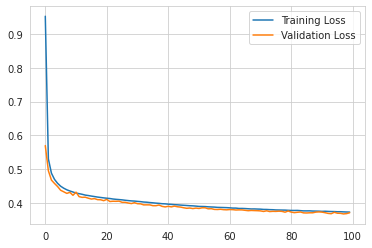

In [98]:
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.plot()

In [99]:
y_pred_momentum = model.predict(x_test)

In [100]:
r_SGD_momentum = r2_score(y_test, y_pred_momentum)
print('Accuracy optained by SGD with Momentum ', r_SGD_momentum)

Accuracy optained by SGD with Momentum  0.6150819306385047


#### 5.8.2 Forecasting Using SGD with momentum

In [101]:
sgd_momentum_forecast = model.predict(test1)

In [102]:
frcast = pd.DataFrame(columns=["center_type", "Forecasted Value"])
frcast["region_code"] = test_data_final["region_code"]
frcast["Forecasted Value"] = sgd_momentum_forecast
frcast.groupby(["region_code"])["Forecasted Value"].agg(sum)

region_code
23    2.235405e+05
34    2.257577e+06
35    5.264288e+04
56    3.804286e+06
71    9.731205e+04
77    1.334442e+06
85    6.317690e+05
93    1.237242e+05
Name: Forecasted Value, dtype: float32

#### 5.9 Using RMSprop

**Algorithm RMSProp**

*Input:* global learning rate factor $\alpha$, decay rate $\rho$, initial parameters $w \in R^d$.

* Initialize $r \leftarrow 0 \in R^d$

* **loop**
  * select a minibatch $\mathcal{B}$ of size $B$
  * compute the stochastic gradient $g \leftarrow \frac{1}{B} \sum_{i \in \mathcal{B}} \nabla f_i(w)$
  * accumulate second moment estimate $r_j \leftarrow \rho r_j + (1 - \rho) g_j^2$ for all $j \in \{1, \ldots, d \}$
  * update model $w_j \rightarrow w_j - \frac{\alpha}{\sqrt{r_j}} \cdot g_j$ for all $j \in \{1, \ldots, d \}$

#### 5.9.1 Training the Neural Network

In [49]:
# Creating model using the Sequential in tensorflow

def model_sequential():
    model = Sequential([
    Dense(160, kernel_initializer='normal', activation='relu'),
    #Dropout(0.2),
    Dense(480, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(256, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
    ])
    return model

#build the model
model = model_sequential()

In [50]:
learning_rate = 0.01

# loss function
msle = MeanSquaredLogarithmicError()

model.compile(loss=msle, optimizer = RMSprop(learning_rate = learning_rate))

# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
4566/4566 [==============================] - 20s 4ms/step - loss: 0.5387 - val_loss: 0.4735
Epoch 2/100
4566/4566 [==============================] - 17s 4ms/step - loss: 0.4661 - val_loss: 0.4979
Epoch 3/100
4566/4566 [==============================] - 16s 4ms/step - loss: 0.4532 - val_loss: 0.4376
Epoch 4/100
4566/4566 [==============================] - 17s 4ms/step - loss: 0.4452 - val_loss: 0.4317
Epoch 5/100
4566/4566 [==============================] - 17s 4ms/step - loss: 0.4401 - val_loss: 0.4257
Epoch 6/100
4566/4566 [==============================] - 16s 4ms/step - loss: 0.4359 - val_loss: 0.4244
Epoch 7/100
4566/4566 [==============================] - 17s 4ms/step - loss: 0.4319 - val_loss: 0.4213
Epoch 8/100
4566/4566 [==============================] - 17s 4ms/step - loss: 0.4297 - val_loss: 0.4316
Epoch 9/100
4566/4566 [==============================] - 16s 4ms/step - loss: 0.4272 - val_loss: 0.4135
Epoch 10/100
4566/4566 [==============================] - 16s 3m

[]

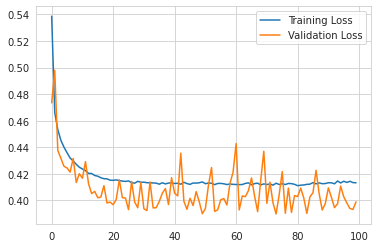

In [51]:
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.plot()

In [52]:
y_pred_RMSprop = model.predict(x_test)

In [53]:
r_SGD_RMSprop = r2_score(y_test, y_pred_RMSprop)
print('Accuracy optained by SGD with RMSProp ', r_SGD_RMSprop)

Accuracy optained by SGD with RMSProp  0.5817923428687384


#### 5.9.2 Forecasting Using SGD with RMSprop

In [54]:
sgd_RMSprop_forecast = model.predict(test1)

In [55]:
frcast = pd.DataFrame(columns=["center_type", "Forecasted Value"])
frcast["region_code"] = test_data_final["region_code"]
frcast["Forecasted Value"] = sgd_RMSprop_forecast
frcast.groupby(["region_code"])["Forecasted Value"].agg(sum)

region_code
23    4.110912e+04
34    3.097802e+06
35    7.337720e+04
56    4.101770e+06
71    1.103514e+05
77    1.665172e+06
85    6.184793e+05
93    1.309292e+05
Name: Forecasted Value, dtype: float32

#### 5.10 Using Adam

**Algorithm Adam**

*Input:* global learning rate factor $\alpha$, decay rates $\rho_1$ and $\rho_2$, initial parameters $w \in R^d$.

* Initialize $r \leftarrow 0 \in R^d$
* Initialize timestep $t \leftarrow 0$

* **loop**
  * update timestep $t \leftarrow t + 1$
  * select a minibatch $\mathcal{B}$ of size $B$
  * compute the stochastic gradient $g \leftarrow \frac{1}{B} \sum_{i \in \mathcal{B}} \nabla f_i(w)$
  * accumulate first moment estimate $s_j \leftarrow \rho_1 s_j + (1 - \rho_1) g_j$ for all $j \in \{1, \ldots, d \}$
  * accumulate second moment estimate $r_j \leftarrow \rho_2 r_j + (1 - \rho_2) g_j^2$ for all $j \in \{1, \ldots, d \}$
  * correct first moment bias $\hat s \leftarrow \frac{s}{1 - \rho_1^t}$ 
  * correct second moment bias $\hat r \leftarrow \frac{r}{1 - \rho_2^t}$
  * update model $w_j \rightarrow w_j - \frac{\alpha}{\sqrt{\hat r_j}} \cdot \hat s_j$ for all $j \in \{1, \ldots, d \}$

**Adam** is Modified RMSProp to  use momentum with exponential weighting, and correct for bias to
estimate the first-order and second-order moments of the gradients

#### 5.10.1 Training the Neural Network

In [56]:
# Creating model using the Sequential in tensorflow

def model_sequential():
    model = Sequential([
    Dense(160, kernel_initializer='normal', activation='relu'),
    #Dropout(0.2),
    Dense(480, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(256, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
    ])
    return model

#build the model
model = model_sequential()

In [57]:
learning_rate = 0.01

# loss function
msle = MeanSquaredLogarithmicError()

model.compile(loss=msle, optimizer = Adam(learning_rate = learning_rate))

# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
4566/4566 [==============================] - 15s 3ms/step - loss: 0.5670 - val_loss: 0.4565
Epoch 2/100
4566/4566 [==============================] - 15s 3ms/step - loss: 0.4621 - val_loss: 0.4358
Epoch 3/100
4566/4566 [==============================] - 14s 3ms/step - loss: 0.4448 - val_loss: 0.4246
Epoch 4/100
4566/4566 [==============================] - 14s 3ms/step - loss: 0.4339 - val_loss: 0.4161
Epoch 5/100
4566/4566 [==============================] - 14s 3ms/step - loss: 0.4274 - val_loss: 0.4185
Epoch 6/100
4566/4566 [==============================] - 14s 3ms/step - loss: 0.4222 - val_loss: 0.4088
Epoch 7/100
4566/4566 [==============================] - 15s 3ms/step - loss: 0.4178 - val_loss: 0.4042
Epoch 8/100
4566/4566 [==============================] - 15s 3ms/step - loss: 0.4149 - val_loss: 0.4111
Epoch 9/100
4566/4566 [==============================] - 15s 3ms/step - loss: 0.4112 - val_loss: 0.3975
Epoch 10/100
4566/4566 [==============================] - 14s 3m

[]

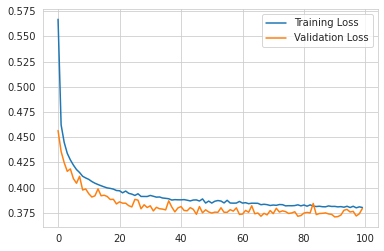

In [58]:
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.plot()

In [59]:
y_pred_Adam = model.predict(x_test)

In [60]:
r_SGD_Adam = r2_score(y_test, y_pred_Adam)
print('Accuracy optained by SGD with Adam ', r_SGD_Adam)

Accuracy optained by SGD with Adam  0.603448401638174


#### 5.10.2 Forecasting Using SGD with Adam

In [61]:
sgd_Adam_forecast = model.predict(test1)

In [62]:
frcast = pd.DataFrame(columns=["center_type", "Forecasted Value"])
frcast["region_code"] = test_data_final["region_code"]
frcast["Forecasted Value"] = sgd_Adam_forecast
frcast.groupby(["region_code"])["Forecasted Value"].agg(sum)

region_code
23    7.540934e+04
34    1.746507e+06
35    4.495527e+04
56    3.952348e+06
71    1.530018e+05
77    1.355715e+06
85    5.843536e+05
93    1.413477e+05
Name: Forecasted Value, dtype: float32

# Section 6 Results

### 6.1 Doing Prediction for the Center Type

#### 6.1.1 Using SGD MiniBatching

When we trained our Neural Network for minibatching taking batch size of 64 for 100 epochs.

We got a R2 Score = 0.5604550218013952

On the Basis of trained model we got prediction for different center types as:

**Urban = 4241440.500**

**Rural = 1289936.125**

**Semi-Urban = 1929209.000**

#### 6.1.2 Using SGD with Momentum

When we trained our Neural Network for SGD with momentum taking batch size of 64 for 100 epochs.

We got a R2 Score = 0.6035360447451232

On the Basis of trained model we got prediction for different center types as:

**Urban = 4335127.500**

**Rural = 1317258.875**

**Semi-Urban = 1876429.750**

#### 6.1.3 Using SGD with RMSprop

When we trained our Neural Network for SGD with RMSprop taking batch size of 64 for 100 epochs.

We got a R2 Score = 0.6004829402849694

On the Basis of trained model we got prediction for different center types as:

**Urban = 5012685.50**

**Rural = 1468611.50**

**Semi-Urban = 2314763.75**

#### 6.1.4 Using SGD with Adam

When we trained our Neural Network for SGD with Adam taking batch size of 64 for 100 epochs.

We got a R2 Score = 0.6263850095974859

On the Basis of trained model we got prediction for different center types as:

**Urban = 4421723.500**

**Rural = 1294889.250**

**Semi-Urban = 1996020.125**

#### From above we can see that for Adam optimizer we got the maximum R2 Score so we'll finalize the predictions we got from the Adam Optimizer

So the Predictions for the next 10 weeks for the three center types is:

Urban = 4421724

Rural = 1294889

Semi-Urban = 1996020

### 6.2 Doing Prediction for Region wise

#### 6.2.1 Using SGD with MiniBatching

When we trained our Neural Network for SGD with minibatching taking batch size of 64 for 100 epochs.

We got a R2 Score = 0.5242986849111096

On the Basis of trained model we got prediction for different region wise as:

**23 ---->   8.740778e+04**

**34 ---->   1.714356e+06**

**35 ---->   4.657308e+04**

**56 ---->   3.372106e+06**

**71 ---->   1.324460e+05**

**77 ---->   1.394108e+06**

**85 ---->   4.691288e+05**

**93 ---->   9.622595e+04**

#### 6.2.2 Using SGD with Momentum

When we trained our Neural Network for SGD with momentum taking batch size of 64 for 100 epochs.

We got a R2 Score = 0.6150819306385047

On the Basis of trained model we got prediction for different region wise as:

**23 ---->   2.235405e+05**

**34 ---->   2.257577e+06**

**35 ---->   5.264288e+04**

**56 ---->   3.804286e+06**

**71 ---->   9.731205e+04**

**77 ---->   1.334442e+06**

**85 ---->   6.317690e+05**

**93 ---->   1.237242e+05**

#### 6.2.3 Using SGD with RMSprop

When we trained our Neural Network for SGD with RMSprop taking batch size of 64 for 100 epochs.

We got a R2 Score = 0.5817923428687384

On the Basis of trained model we got prediction for different region wise as:

**23 ---->   4.110912e+04**

**34 ---->   3.097802e+06**

**35 ---->   7.337720e+04**

**56 ---->   4.101770e+06**

**71 ---->   1.103514e+05**

**77 ---->   1.665172e+06**

**85 ---->   6.184793e+05**

**93 ---->   1.309292e+05**

#### 6.2.4 Using SGD with Adam

When we trained our Neural Network for SGD with Adam taking batch size of 64 for 100 epochs.

We got a R2 Score = 0.603448401638174

On the Basis of trained model we got prediction for different region wise as:

**23 ---->   7.540934e+04**

**34 ---->   1.746507e+06**

**35 ---->   4.495527e+04**

**56 ---->   3.952348e+06**

**71 ---->   1.530018e+05**

**77 ---->   1.355715e+06**

**85 ---->   5.843536e+05**

**93 ---->   1.413477e+05**

#### From above we can see that for Momentum optimizer we got the maximum R2 Score so we'll finalize the predictions we got from the momentum Optimizer

23 ----> 2.235405e+05

34 ----> 2.257577e+06

35 ----> 5.264288e+04

56 ----> 3.804286e+06

71 ----> 9.731205e+04

77 ----> 1.334442e+06

85 ----> 6.317690e+05

93 ----> 1.237242e+05

### Section 7:  References

[1] https://towardsdatascience.com/forecasting-food-demand-applying-neural-networks-to-the-meal-kit-industry-6f1e3b2207aa

[2] https://www.kaggle.com/datasets/kannanaikkal/food-demand-forecasting?select=train.csv

[3]https://www.sciencedirect.com/science/article/abs/pii/S0895435696000029#:~:text=Neural%20networks%20offer%20a%20number,the%20availability%20of%20multiple%20training